Group 6:

- Chen Siyi           A0194556R
- Gao Haochun   A0194525Y
- He Yuan      A0211297H
- Wang Pei       A0194486M
- Wang Zi         A0194504E

In [2]:
install.packages("tidyr")
install.packages("dplyr")
install.packages("Hmisc")
install.packages("corrplot")
install.packages("ggplot2")

# feature selection
install.packages("leaps")
install.packages("glmnet")

# SVM
install.packages("e1071")

# CART tree
install.packages("partykit") 
install.packages("rpart") 
install.packages("rpart.plot")

# C50 tree
install.packages("C50")

# Bagging
install.packages("caret") 
install.packages("ipred") 

# Random forest
install.packages("randomForest")

# Naive Bayes
install.packages("naivebayes")

# GBM
install.packages("gbm")

# Neural Networks
install.packages("nnet")
install.packages("NeuralNetTools")

# Model evaluation
install.packages("InformationValue")
install.packages("MLmetrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘m

In [105]:
# Load packages

# Data cleaning and plotting tools
library(tidyr)
library(dplyr)
library(Hmisc)
library(corrplot)
library(ggplot2)

# feature selection
library(leaps)

# SVM
library(e1071)

# CART tree
library(partykit) 
library(rpart) 
library(rpart.plot)

# C50 tree
library(C50)

# Bagging
library(caret) 
library(ipred) 

# Random forest
library(randomForest)

# Naive Bayes
library(naivebayes)

# gbm
library(gbm)

# Neural Networks
library(nnet)
library(NeuralNetTools)

# Model evaluation
library(InformationValue)
library(MLmetrics)

In [106]:
# Helper functions
print_accuracy = function (predicted, target) {
  tbl = table(predicted, target)
  print(t(tbl))
  print(paste("Overall Accuracy: ", round(100*mean(predicted == target),2),"%"))
  print(paste("TPR: ", round(100*tbl[2,2] / (tbl[1,2] + tbl[2,2]),2), "%"))
  print(paste("F1 Score: ", round(100*F1_Score(y_pred = predicted, y_true = target, positive=1),2), "%"))
}

In [107]:
# Load data set
# Before running, please put data set into this colab session

card = read.csv("card.csv", header = TRUE, skip = 1)

# Rename pay_0 as pay_1, "default.payment.next.month" as 'target'
names(card)[names(card) == "PAY_0"] <- "PAY_1"
names(card)[names(card) == "default.payment.next.month"] <- "TARGET"

# Configure data types
# Categorical
card$SEX = as.factor(card$SEX)
card$MARRIAGE = as.factor(card$MARRIAGE)
card$TARGET = as.factor(card$TARGET)
# ordinal
card$EDUCATION = as.factor(card$EDUCATION)


card$TARGET 
       n  missing distinct 
   30000        0        2 
                      
Value          0     1
Frequency  23364  6636
Proportion 0.779 0.221

card[, c("SEX", "EDUCATION", "MARRIAGE")] 

 3  Variables      30000  Observations
--------------------------------------------------------------------------------
SEX 
       n  missing distinct 
   30000        0        2 
                      
Value          1     2
Frequency  11888 18112
Proportion 0.396 0.604
--------------------------------------------------------------------------------
EDUCATION 
       n  missing distinct 
   30000        0        7 

lowest : 0 1 2 3 4, highest: 2 3 4 5 6
                                                    
Value          0     1     2     3     4     5     6
Frequency     14 10585 14030  4917   123   280    51
Proportion 0.000 0.353 0.468 0.164 0.004 0.009 0.002
--------------------------------------------------------------------------------
MARRIAGE 
       n  missing distinct 
   30000        0        4 
                                  
Value          0     1     2     3
Frequency     54 13659 15964   323
Proportion 0.002 0.455 0.532 0.

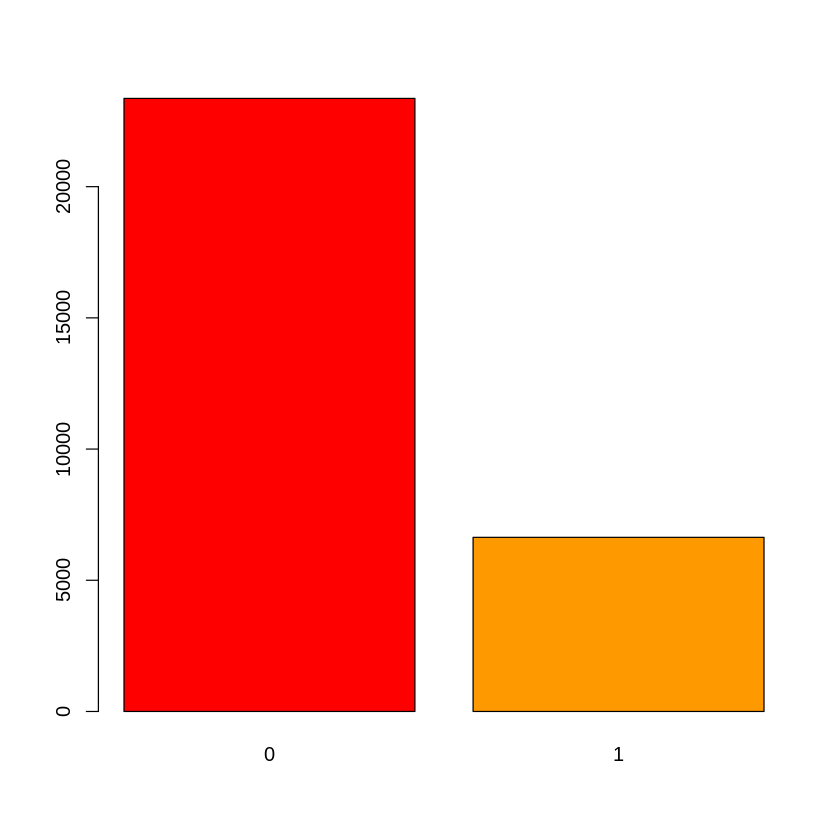

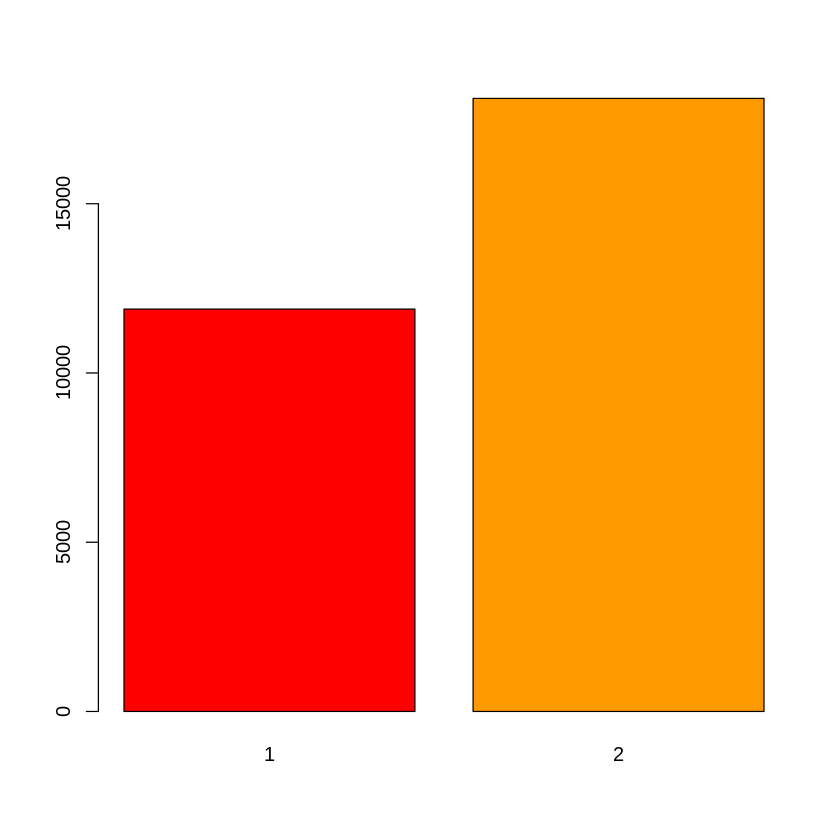

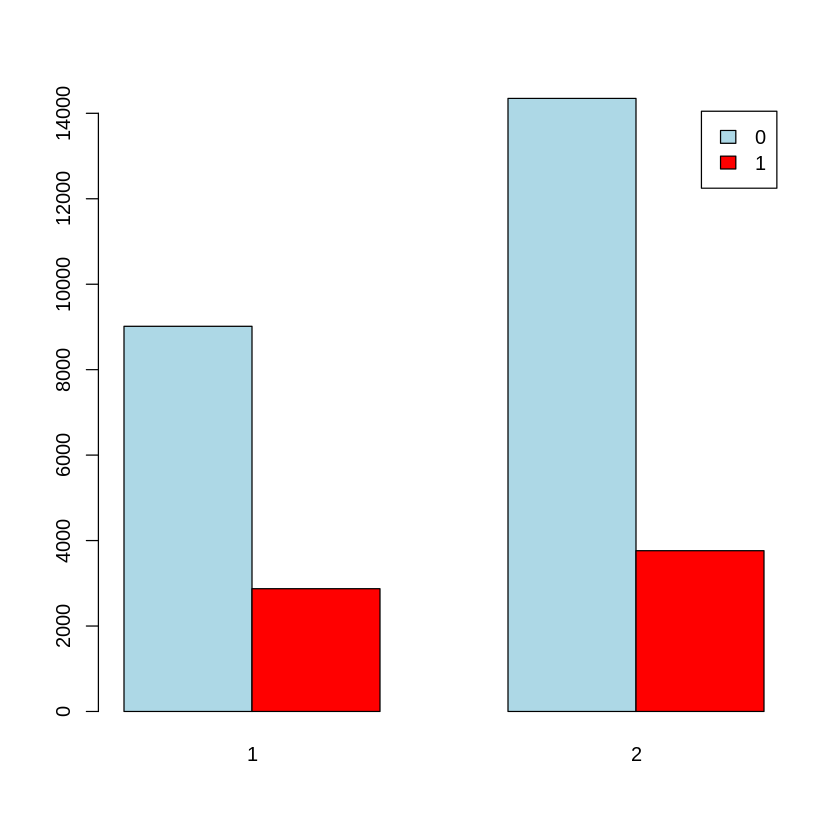

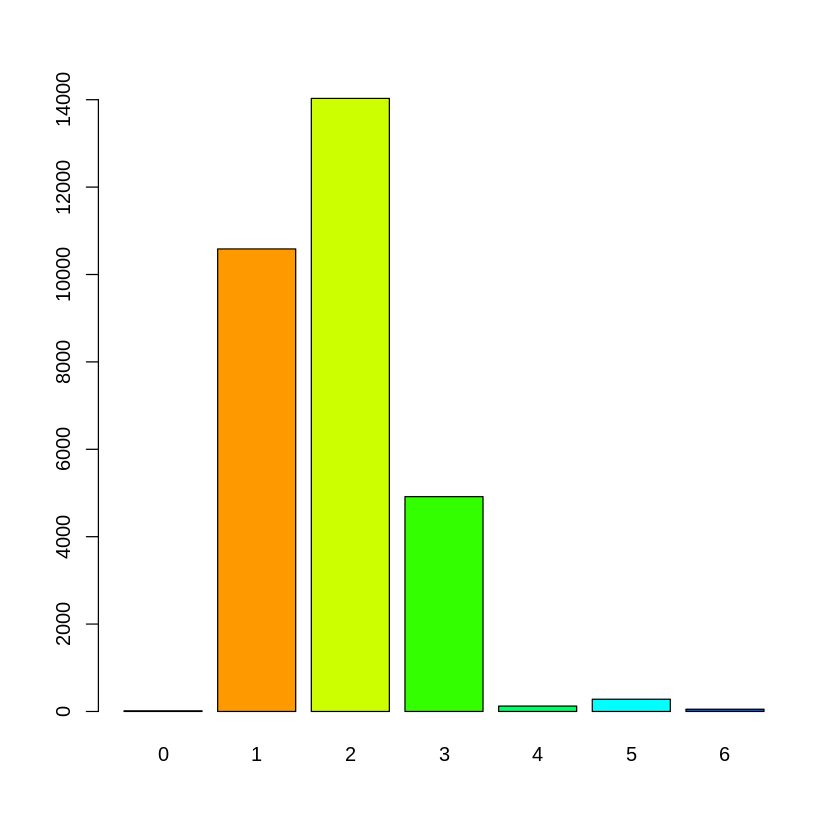

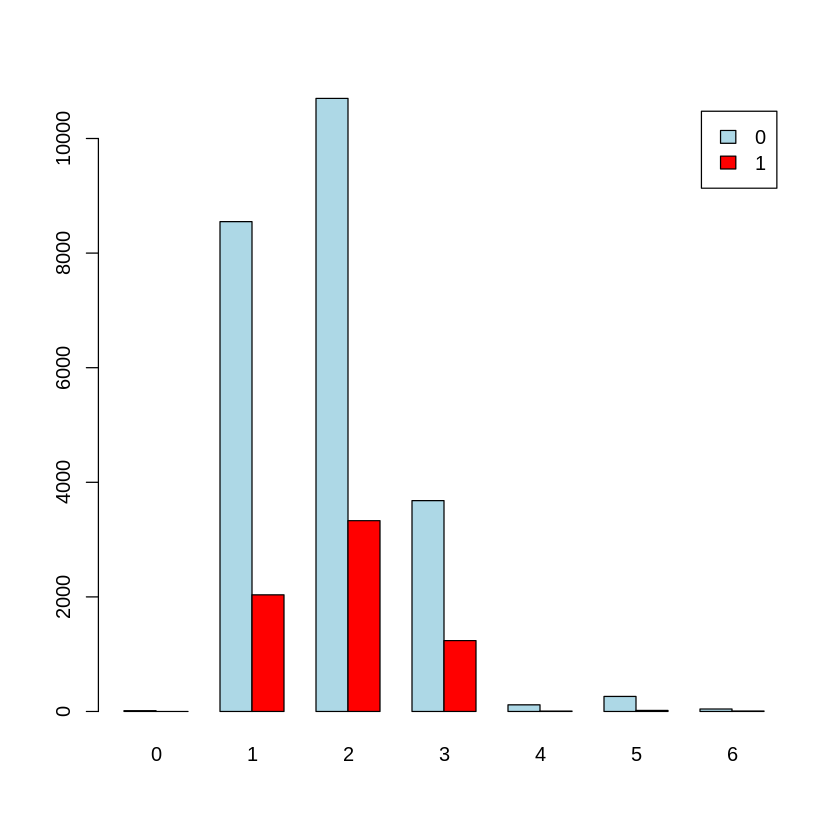

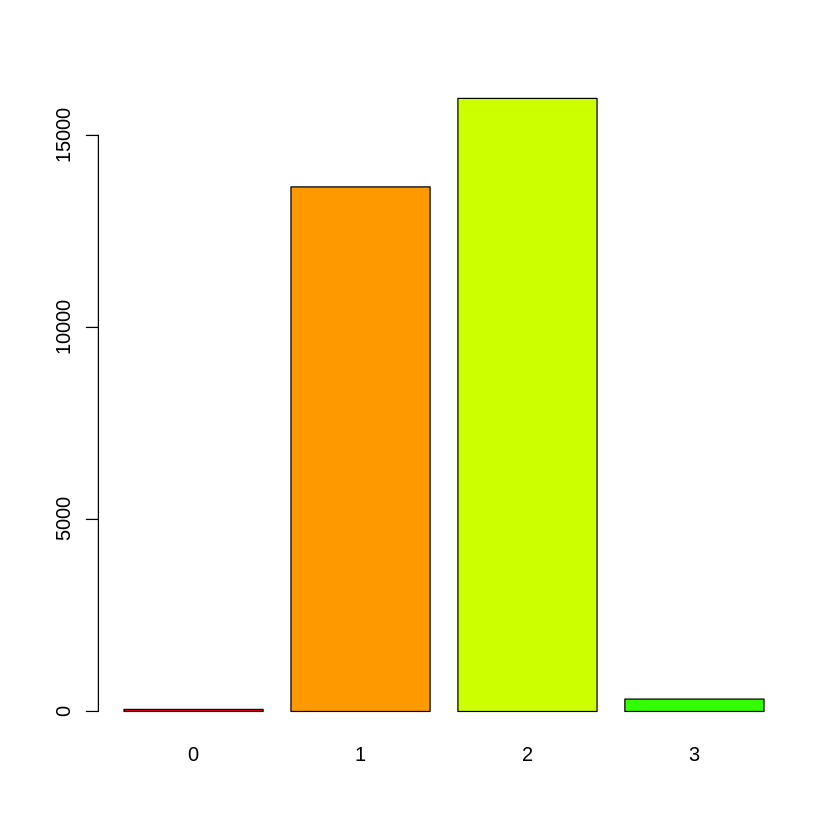

card$AGE 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0       56    0.999    35.49     10.3       23       25 
     .25      .50      .75      .90      .95 
      28       34       41       49       53 

lowest : 21 22 23 24 25, highest: 72 73 74 75 79

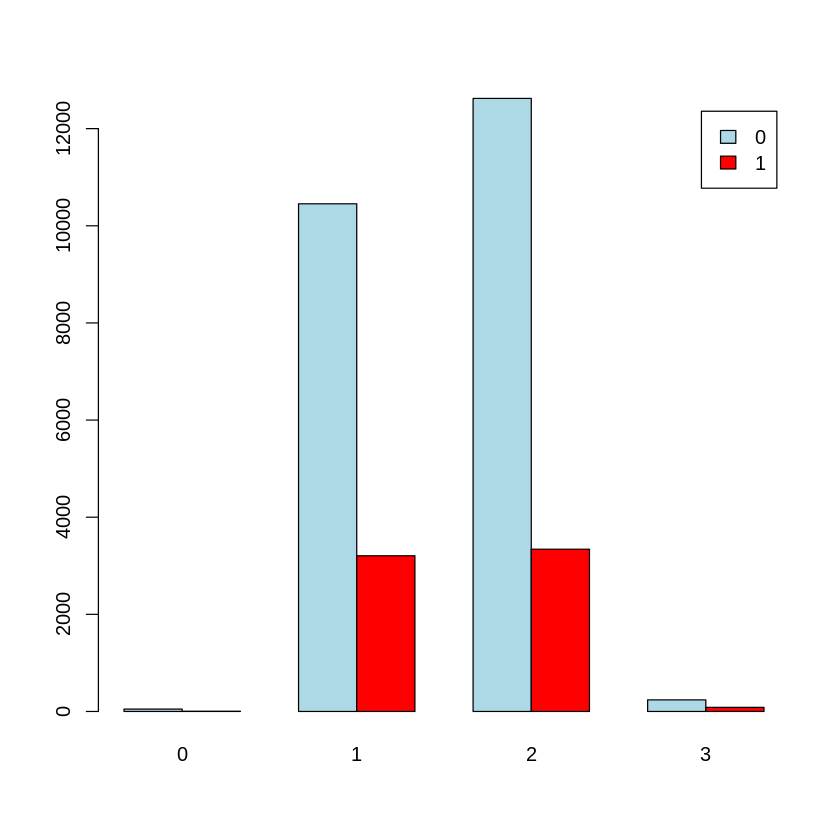

card[, c("LIMIT_BAL")] 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0       81    0.998   167484   141783    20000    30000 
     .25      .50      .75      .90      .95 
   50000   140000   240000   360000   430000 

lowest :   10000   16000   20000   30000   40000
highest:  750000  760000  780000  800000 1000000

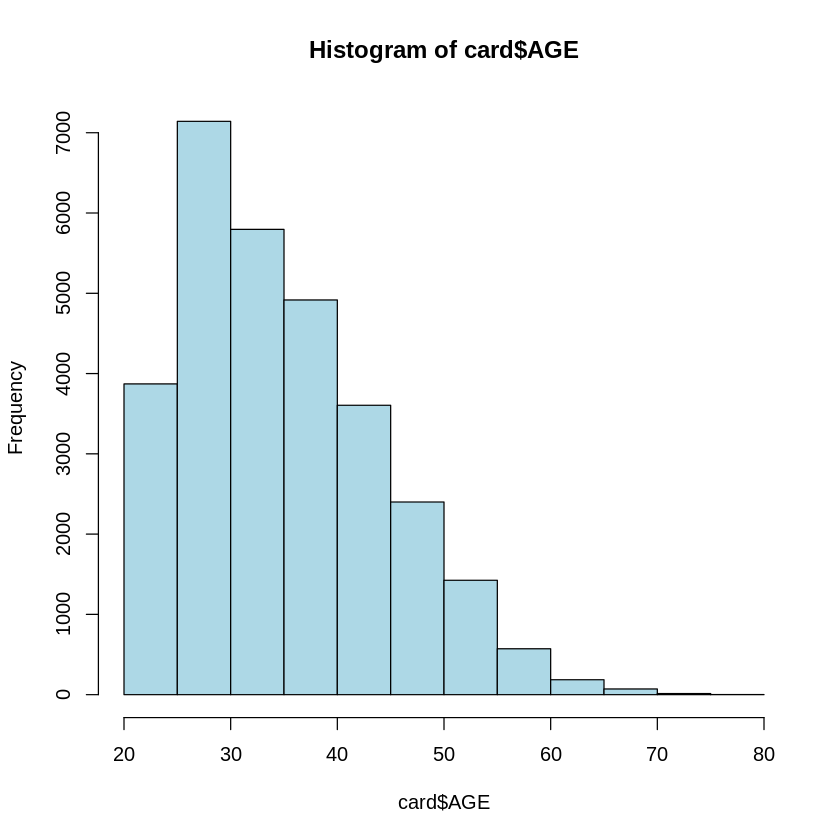

card[, c("PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6")] 

 6  Variables      30000  Observations
--------------------------------------------------------------------------------
PAY_1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0       11    0.871  -0.0167    1.159       -2       -1 
     .25      .50      .75      .90      .95 
      -1        0        0        2        2 

lowest : -2 -1  0  1  2, highest:  4  5  6  7  8
                                                                            
Value         -2    -1     0     1     2     3     4     5     6     7     8
Frequency   2759  5686 14737  3688  2667   322    76    26    11     9    19
Proportion 0.092 0.190 0.491 0.123 0.089 0.011 0.003 0.001 0.000 0.000 0.001
--------------------------------------------------------------------------------
PAY_2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0       11    0.843  -0.1338    1.

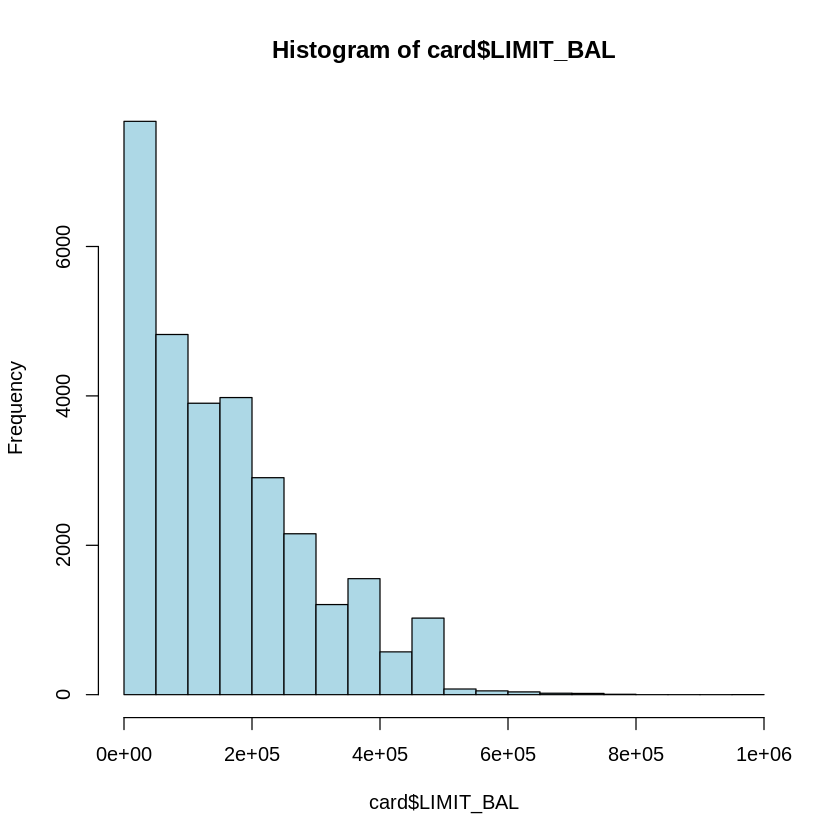

card[, c("BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6")] 

 6  Variables      30000  Observations
--------------------------------------------------------------------------------
BILL_AMT1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0    22723        1    51223    66644      0.0    278.9 
     .25      .50      .75      .90      .95 
  3558.8  22381.5  67091.0 142133.7 201203.0 

lowest : -165580 -154973  -15308  -14386  -11545
highest:  626648  630458  653062  746814  964511
--------------------------------------------------------------------------------
BILL_AMT2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0    22346    0.999    49179    64269        0        0 
     .25      .50      .75      .90      .95 
    2985    21200    64006   136906   194792 

lowest : -69777 -67526 -33350 -30000 -26214, highest: 624475 646770 671563 743970 983931
----------------------

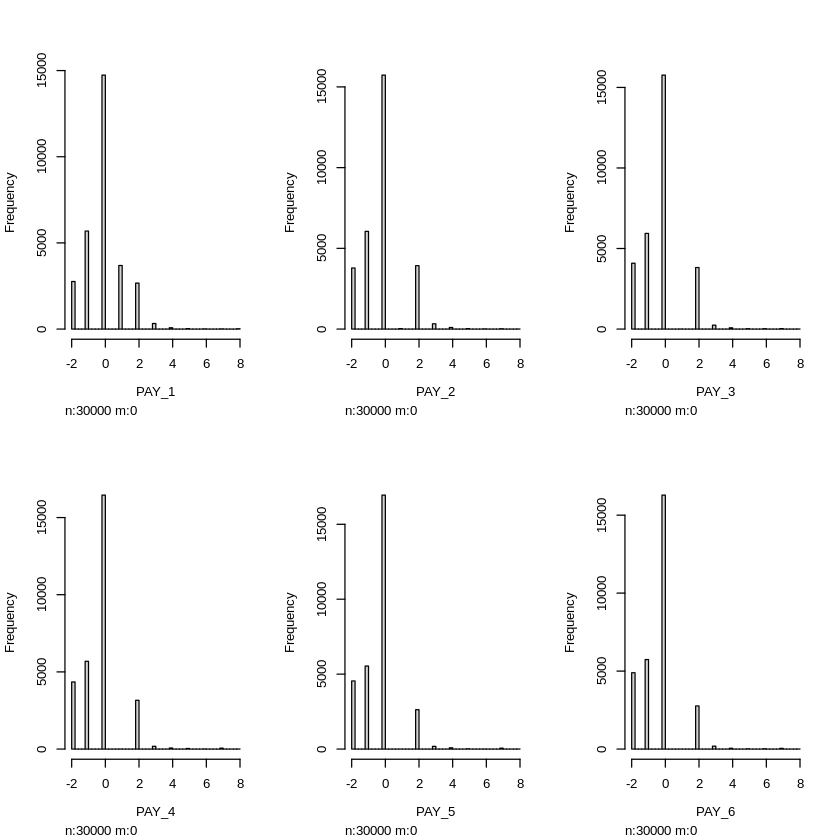

card[, c("PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6")] 

 6  Variables      30000  Observations
--------------------------------------------------------------------------------
PAY_AMT1 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0     7943    0.994     5664     7939        0        0 
     .25      .50      .75      .90      .95 
    1000     2100     5006    10300    18428 

lowest :      0      1      2      3      4, highest: 405016 423903 493358 505000 873552
--------------------------------------------------------------------------------
PAY_AMT2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   30000        0     7899    0.994     5921     8602        0        0 
     .25      .50      .75      .90      .95 
     833     2009     5000    10401    19004 

lowest :       0       1       2       3       4
highest:  580464 1024516 1215471 1227082 1684259
------------------------------

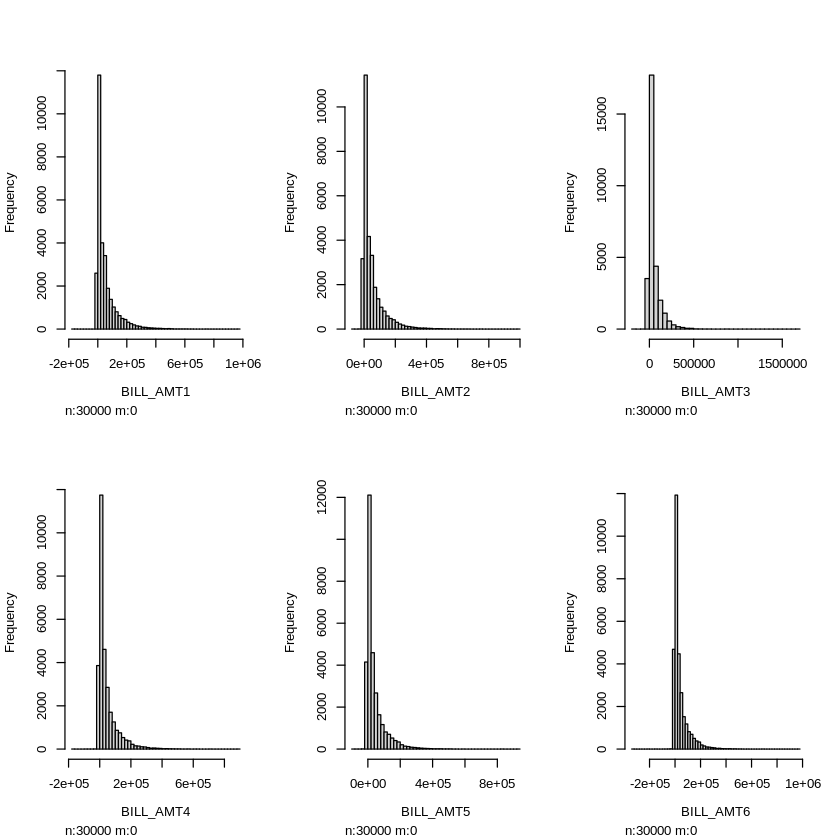

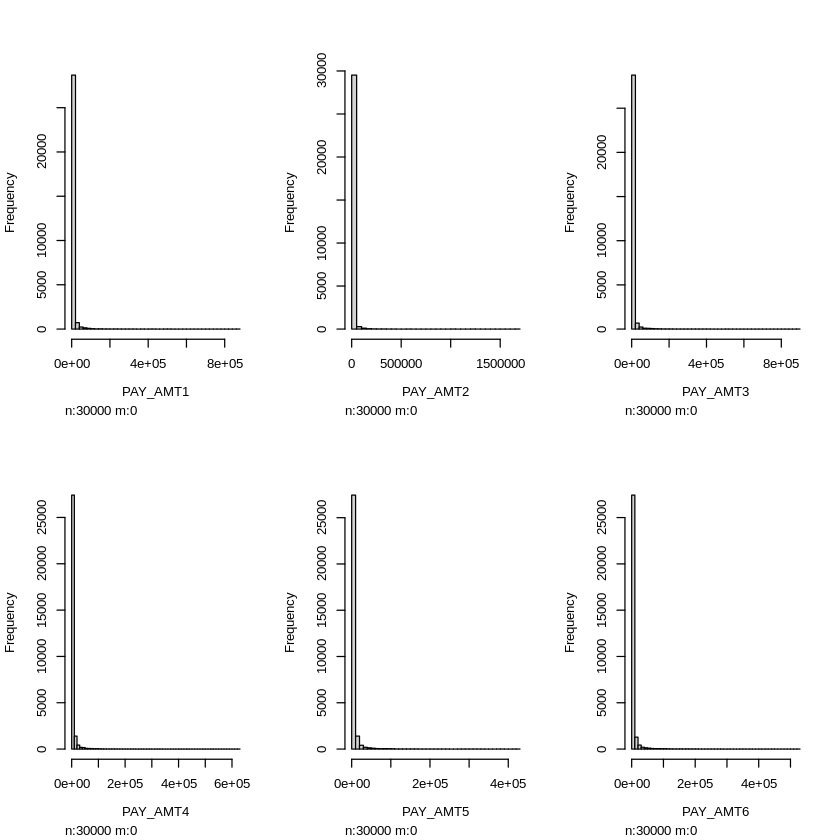

In [108]:
# Data information

# Categorical data
describe(card$TARGET)
barplot(table(card$TARGET), col=rainbow(10))

describe(card[,c('SEX', 'EDUCATION', 'MARRIAGE')]) 
barplot(table(card$SEX),col=rainbow(10)) # SEX looks fine
barplot(table(card$TARGET, card$SEX), col=c("lightblue", "red"),beside = TRUE,legend=TRUE)

barplot(table(card$EDUCATION),col=rainbow(10)) # Education: 0 undocumented. 5,6 others
barplot(table(card$TARGET, card$EDUCATION), col=c("lightblue", "red"),beside = TRUE,legend=TRUE)

barplot(table(card$MARRIAGE),col=rainbow(10)) # Marriage: 0 undocumented. 3 others
barplot(table(card$TARGET, card$MARRIAGE), col=c("lightblue", "red"),beside = TRUE,legend=TRUE)

describe(card$AGE)
hist(card$AGE, col = "lightblue") # Looks fine

# Continuous data
describe(card[,c('LIMIT_BAL')]) # Broad range
hist(card$LIMIT_BAL, col = "lightblue")

describe(card[,c('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')]) 
hist(card[,c('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')], col = "lightblue")
# -2, -1, 0 should be combined as 0

describe(card[,c('BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')]) 
# Negative values can be interpreted as credit? Has to be investigated
hist(card[,c('BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6')], col = "lightblue")

describe(card[,c('PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6')]) 
hist(card[,c('PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6')], col = "lightblue")

card[, c("EDUCATION", "MARRIAGE")] 

 2  Variables      30000  Observations
--------------------------------------------------------------------------------
EDUCATION 
       n  missing distinct 
   30000        0        5 

lowest : 1 2 3 4 5, highest: 1 2 3 4 5
                                        
Value          1     2     3     4     5
Frequency  10585 14030  4917   123   345
Proportion 0.353 0.468 0.164 0.004 0.012
--------------------------------------------------------------------------------
MARRIAGE 
       n  missing distinct 
   30000        0        3 
                            
Value          1     2     3
Frequency  13659 15964   377
Proportion 0.455 0.532 0.013
--------------------------------------------------------------------------------

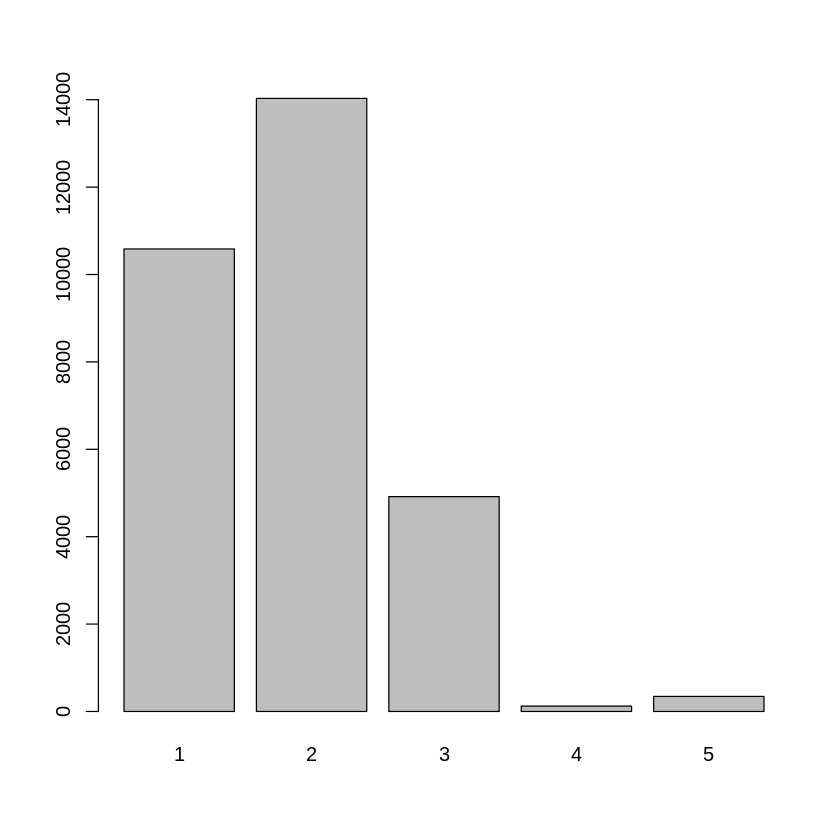

card[, c("PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6")] 

 6  Variables      30000  Observations
--------------------------------------------------------------------------------
PAY_1 
       n  missing distinct     Info     Mean      Gmd 
   30000        0        9    0.536   0.3568   0.5879 

lowest : 0 1 2 3 4, highest: 4 5 6 7 8
                                                                
Value          0     1     2     3     4     5     6     7     8
Frequency  23182  3688  2667   322    76    26    11     9    19
Proportion 0.773 0.123 0.089 0.011 0.003 0.001 0.000 0.000 0.001
--------------------------------------------------------------------------------
PAY_2 
       n  missing distinct     Info     Mean      Gmd 
   30000        0        9    0.379     0.32   0.5525 

lowest : 0 1 2 3 4, highest: 4 5 6 7 8
                                                                
Value          0     1     2     3     4     5     6     7     8
Frequency  25562    28  3927 

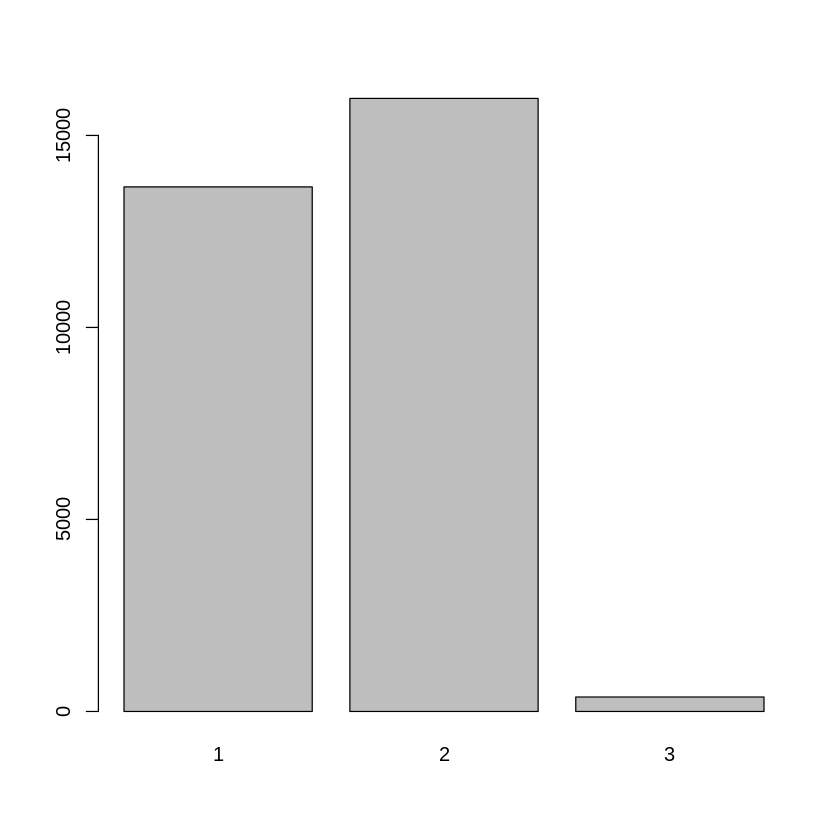

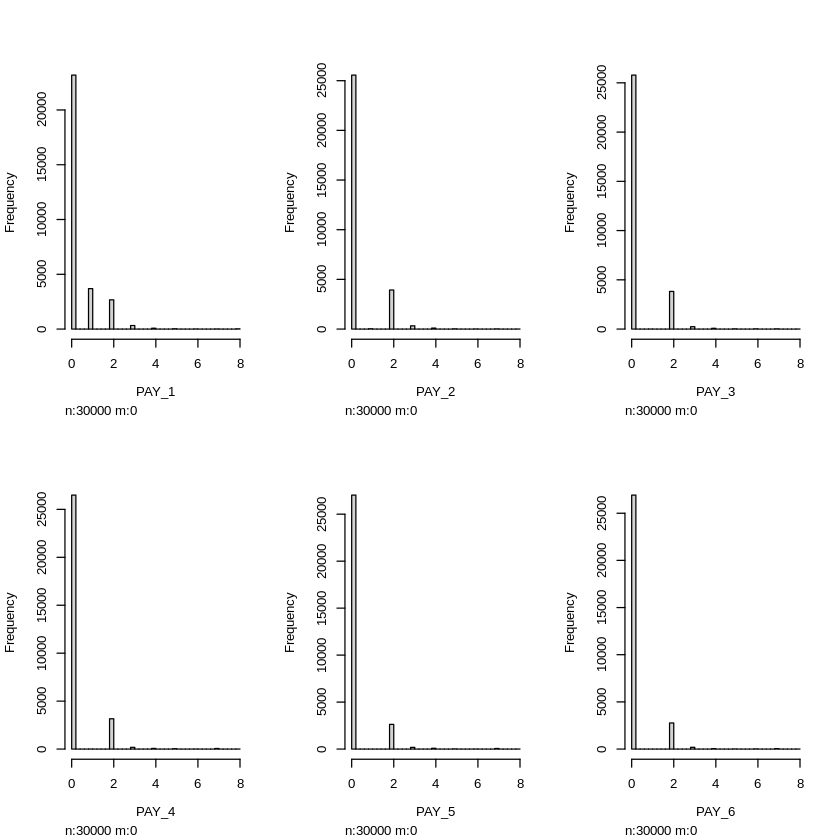

In [109]:
# Data cleaning
# Education: combine 0, 5, 6 -> 5
# Marriage: 0 -> 3
# PAY_i: -2, -1, 0 -> 0
card$EDUCATION[card$EDUCATION==0 | card$EDUCATION==5 | card$EDUCATION==6] = 5
card$MARRIAGE[card$MARRIAGE==0] = 3
card$EDUCATION = factor(card$EDUCATION)
card$MARRIAGE = factor(card$MARRIAGE)
card$PAY_1[card$PAY_1==-2 | card$PAY_1==-1] = 0
card$PAY_2[card$PAY_2==-2 | card$PAY_2==-1] = 0
card$PAY_3[card$PAY_3==-2 | card$PAY_3==-1] = 0
card$PAY_4[card$PAY_4==-2 | card$PAY_4==-1] = 0
card$PAY_5[card$PAY_5==-2 | card$PAY_5==-1] = 0
card$PAY_6[card$PAY_6==-2 | card$PAY_6==-1] = 0

# Check cleaned data
describe(card[,c("EDUCATION","MARRIAGE")])
barplot(table(card$EDUCATION))
barplot(table(card$MARRIAGE))
describe(card[,c('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')]) 
hist(card[,c('PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6')])

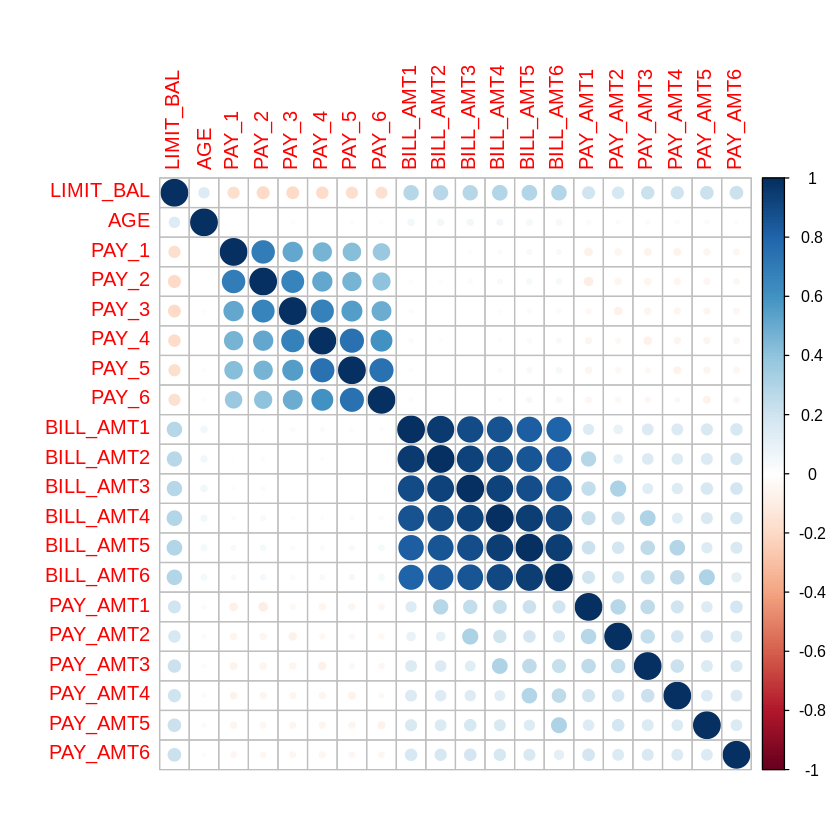

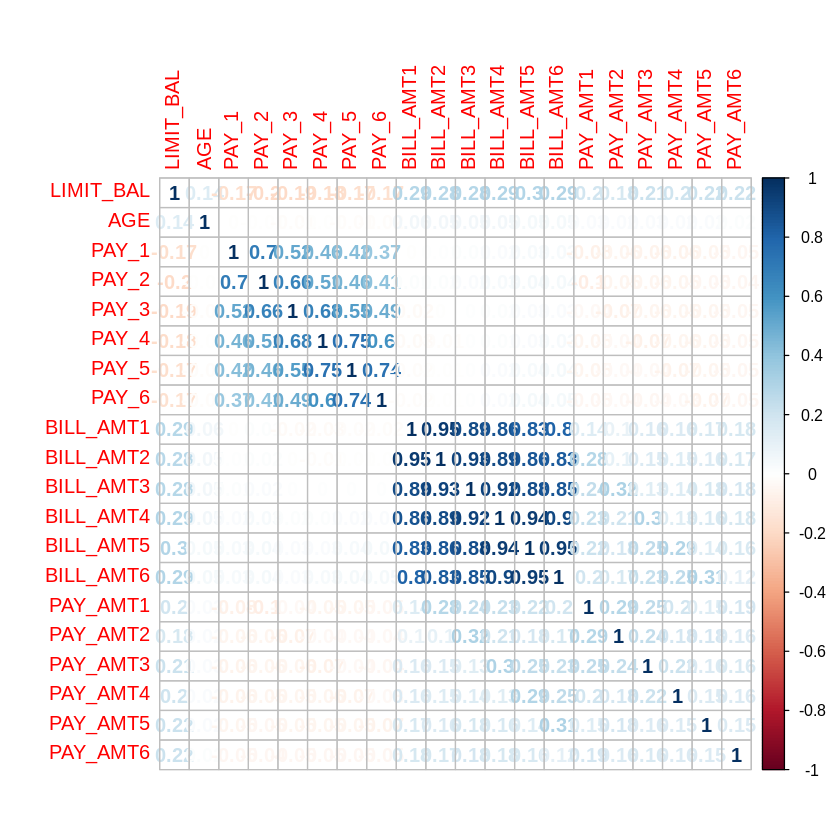

In [110]:
# Correlation
res <- cor(as.matrix(card[,-c(1,3,4,5,25)]))
# Use rcorr from Hmisc
# res <- rcorr(as.matrix(train.data[,1:7]))
corrplot(res, method="circle")
corrplot(res, method="number")
# Bill_AMT 1 - 6 high correlation

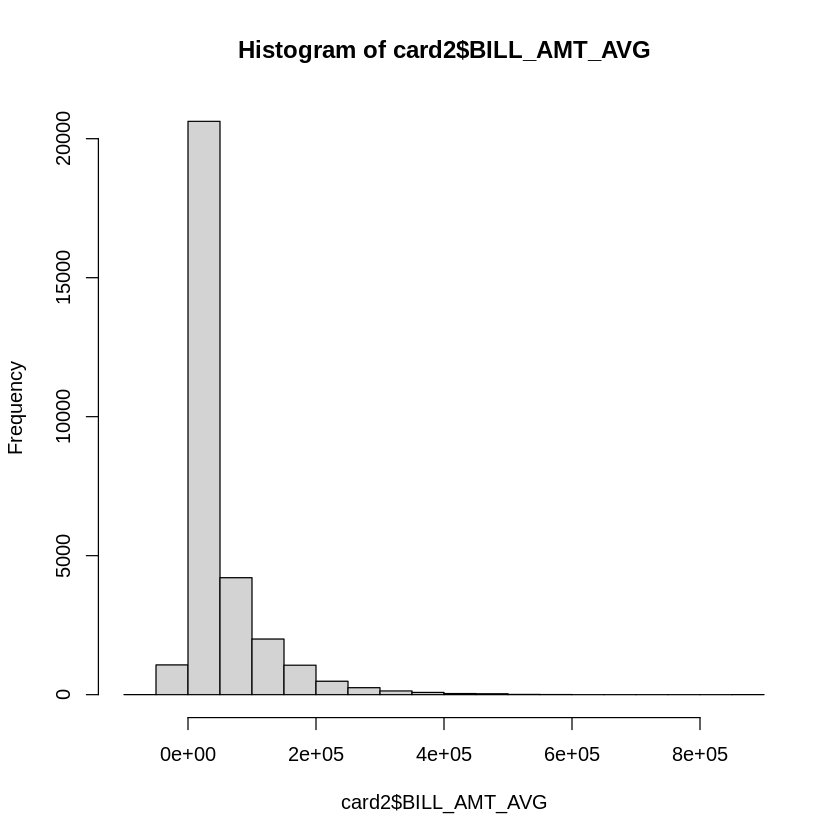

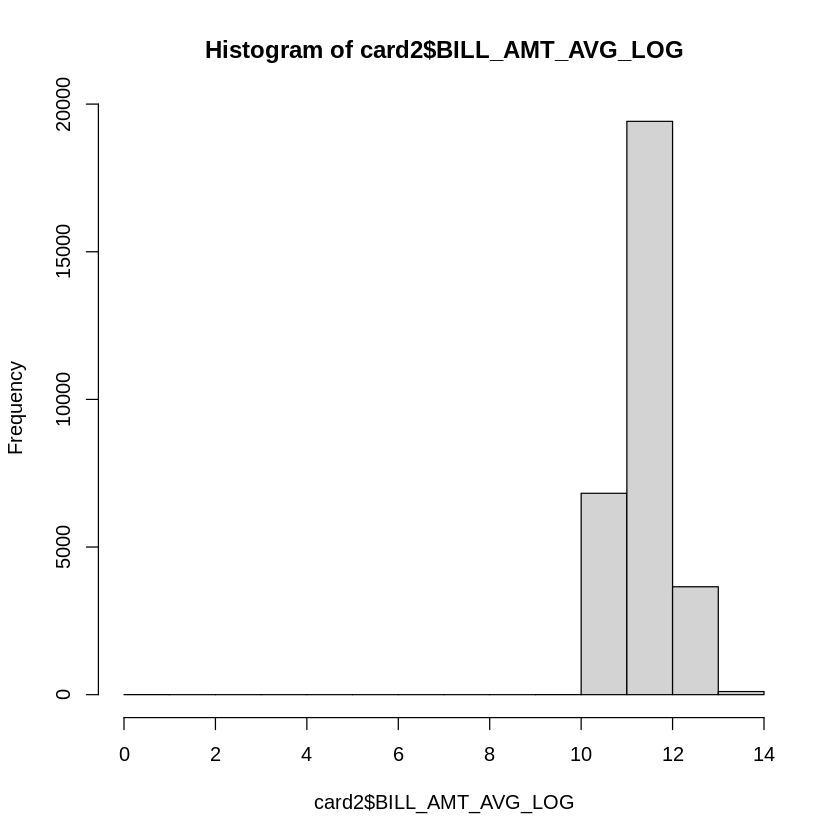

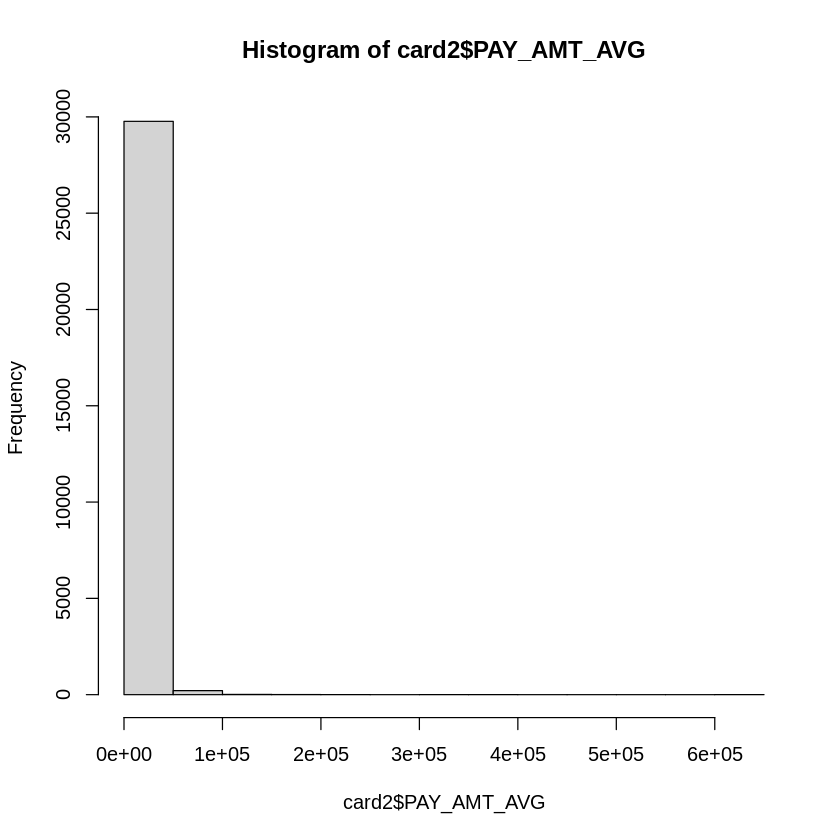

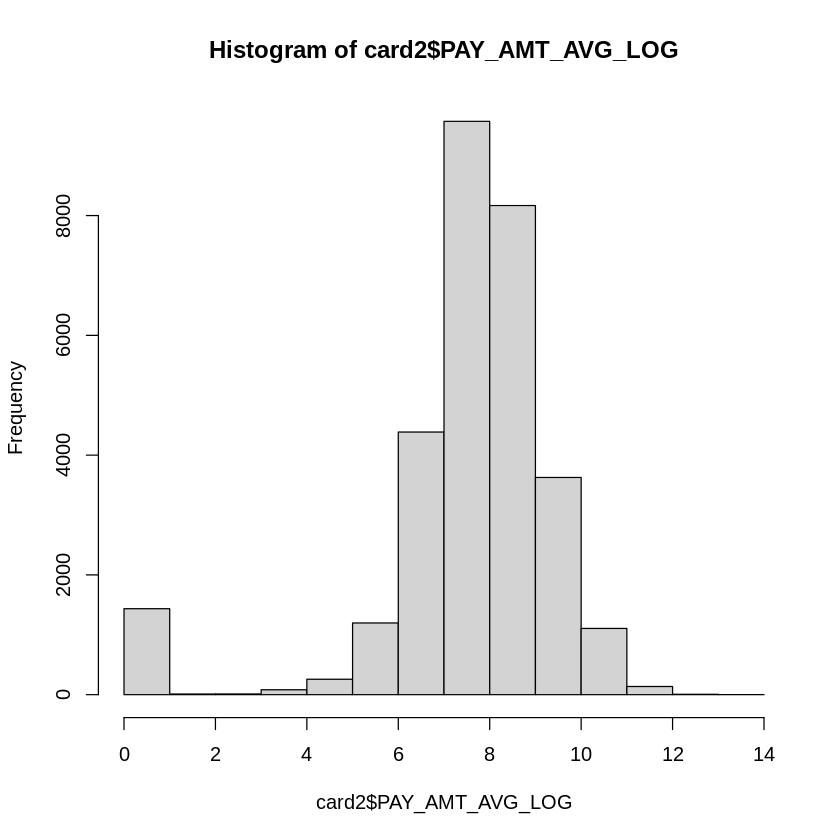

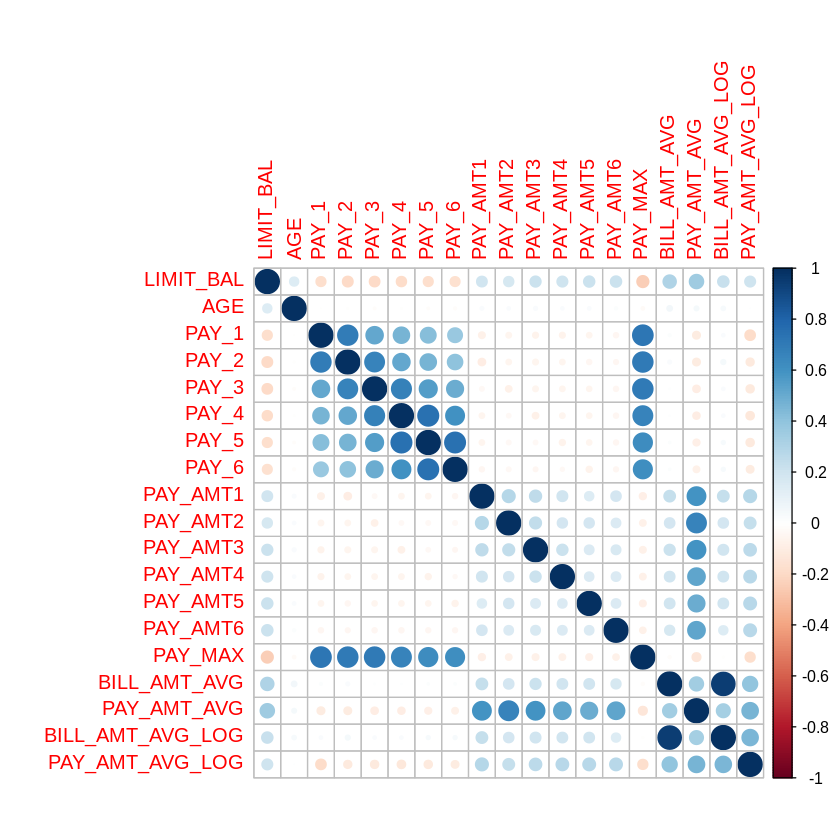

In [111]:
# Feature engineering
card2 = card

# Take maximum of PAY 1 - 6
card2$PAY_MAX = apply(card[,c("PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6")],1,max)
# Take average of bill_amt and pay_amt 
card2$BILL_AMT_AVG = rowMeans(card[,13:18])
card2$PAY_AMT_AVG = rowMeans(card[,19:24])
card2[,13:18] = NULL

# Log transformation on average bill_amt
hist(card2$BILL_AMT_AVG)
card2$BILL_AMT_AVG_LOG = log(card2$BILL_AMT_AVG + 1 - min(card2$BILL_AMT_AVG))
hist(card2$BILL_AMT_AVG_LOG)
# Log transformation on average pay_amt
hist(card2$PAY_AMT_AVG)
card2$PAY_AMT_AVG_LOG = log(card2$PAY_AMT_AVG + 1 - min(card2$PAY_AMT_AVG))
hist(card2$PAY_AMT_AVG_LOG)

# Check correlation 
res = cor(as.matrix(card2[,-c(1,3,4,5,19)]))
corrplot(res, method="circle")

In [112]:
# Data split
set.seed(666)

index = 1:nrow(card2)
n = nrow(card2)
testIndex = sample(index, trunc(n)/3)

testSet = card2[testIndex,]
trainSet = card2[-testIndex, ]

train.target = trainSet$TARGET
test.target = testSet$TARGET

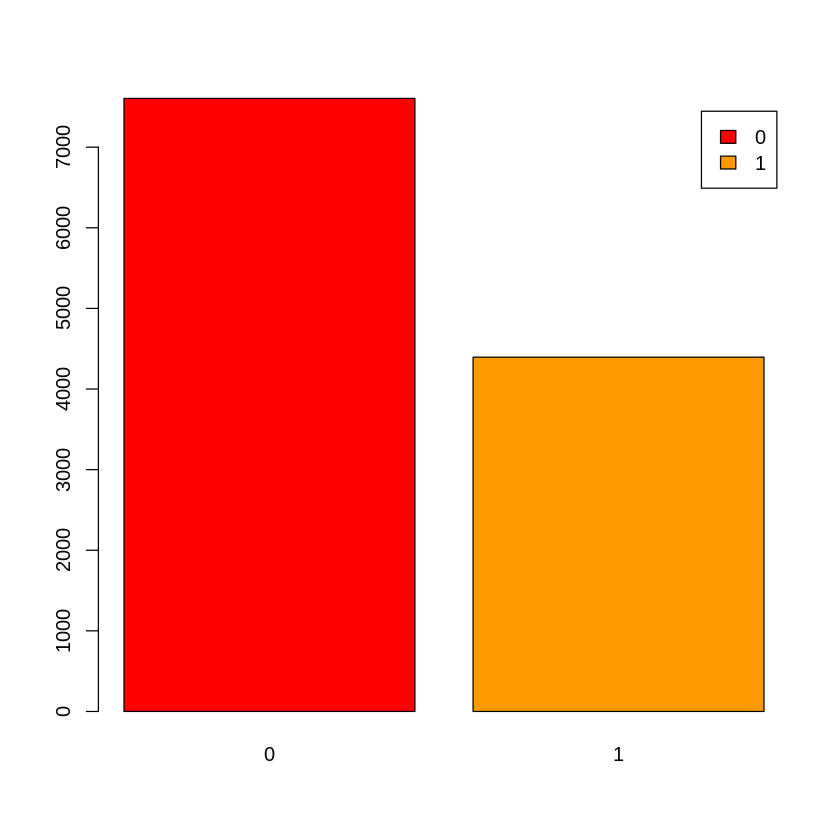

In [113]:
# Train set data balancing
set.seed(666)
# Sampling out 8000 cases 0-target-value examples in train set
# to balance data
train_0 = which(trainSet$TARGET == 0)
selectedGoodCustomers = sample(train_0, size = 8000) # Randomly sample 8000 cases
trainSet2 = trainSet[-selectedGoodCustomers,]
barplot(table(trainSet2$TARGET),col=rainbow(10),legend=TRUE)

train.target = trainSet2$TARGET
test.target = testSet$TARGET

# View(trainSet)
trainSetFull = trainSet2[,-c(1,19)] # Get rid of ID and target column
testSetFull = testSet[,-c(1,19)]

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(train.target ~ ., trainSetFull, method = "backward")
26 Variables  (and intercept)
                 Forced in Forced out
LIMIT_BAL            FALSE      FALSE
SEX2                 FALSE      FALSE
EDUCATION2           FALSE      FALSE
EDUCATION3           FALSE      FALSE
EDUCATION4           FALSE      FALSE
EDUCATION5           FALSE      FALSE
MARRIAGE2            FALSE      FALSE
MARRIAGE3            FALSE      FALSE
AGE                  FALSE      FALSE
PAY_1                FALSE      FALSE
PAY_2                FALSE      FALSE
PAY_3                FALSE      FALSE
PAY_4                FALSE      FALSE
PAY_5                FALSE      FALSE
PAY_6                FALSE      FALSE
PAY_AMT1             FALSE      FALSE
PAY_AMT2             FALSE      FALSE
PAY_AMT3             FALSE      FALSE
PAY_AMT4             FALSE      FALSE
PAY_AMT5             FALSE      FALSE
PAY_AMT6             FALSE      FALSE
PAY_MAX              FALSE      

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(train.target ~ ., trainSetFull, method = "forward")
26 Variables  (and intercept)
                 Forced in Forced out
LIMIT_BAL            FALSE      FALSE
SEX2                 FALSE      FALSE
EDUCATION2           FALSE      FALSE
EDUCATION3           FALSE      FALSE
EDUCATION4           FALSE      FALSE
EDUCATION5           FALSE      FALSE
MARRIAGE2            FALSE      FALSE
MARRIAGE3            FALSE      FALSE
AGE                  FALSE      FALSE
PAY_1                FALSE      FALSE
PAY_2                FALSE      FALSE
PAY_3                FALSE      FALSE
PAY_4                FALSE      FALSE
PAY_5                FALSE      FALSE
PAY_6                FALSE      FALSE
PAY_AMT1             FALSE      FALSE
PAY_AMT2             FALSE      FALSE
PAY_AMT3             FALSE      FALSE
PAY_AMT4             FALSE      FALSE
PAY_AMT5             FALSE      FALSE
PAY_AMT6             FALSE      FALSE
PAY_MAX              FALSE      F

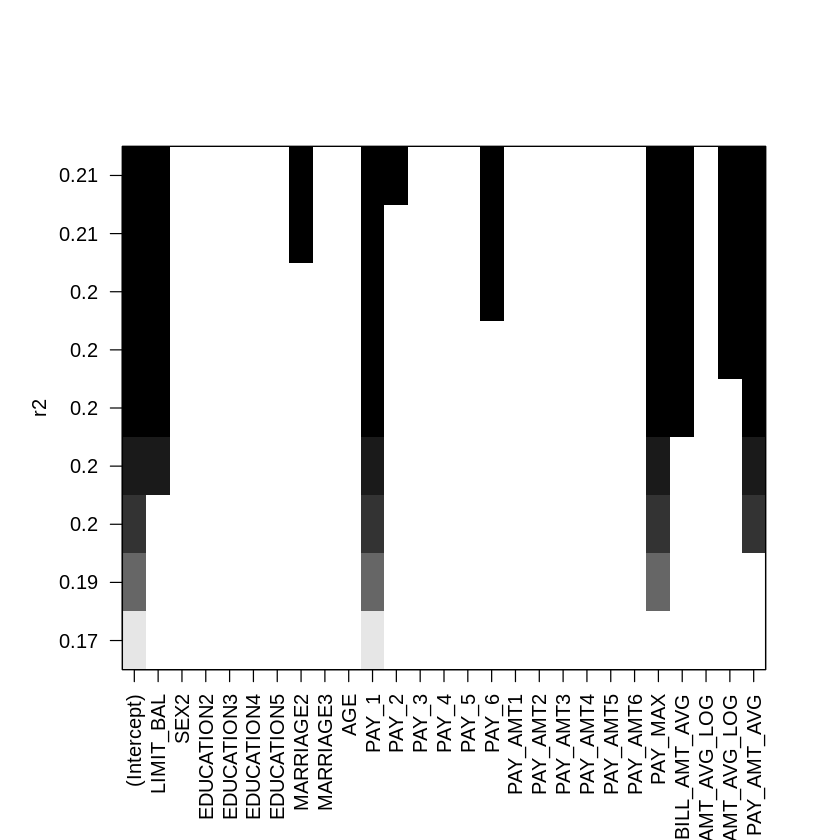


Call:
glm(formula = train.target ~ ., family = "binomial", data = trainSetFull)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2869  -0.7658  -0.6255   0.8630   2.5762  

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       8.327e+00  1.880e+00   4.429 9.47e-06 ***
LIMIT_BAL        -1.785e-06  2.226e-07  -8.019 1.06e-15 ***
SEX2             -1.172e-01  4.430e-02  -2.645  0.00816 ** 
EDUCATION2        8.240e-03  5.066e-02   0.163  0.87079    
EDUCATION3       -6.516e-02  6.775e-02  -0.962  0.33613    
EDUCATION4       -1.994e+00  7.431e-01  -2.684  0.00728 ** 
EDUCATION5       -8.186e-01  2.723e-01  -3.006  0.00264 ** 
MARRIAGE2        -1.312e-01  5.021e-02  -2.613  0.00898 ** 
MARRIAGE3         2.490e-03  1.831e-01   0.014  0.98915    
AGE               2.188e-03  2.698e-03   0.811  0.41735    
PAY_1             7.133e-01  4.123e-02  17.301  < 2e-16 ***
PAY_2             6.094e-02  

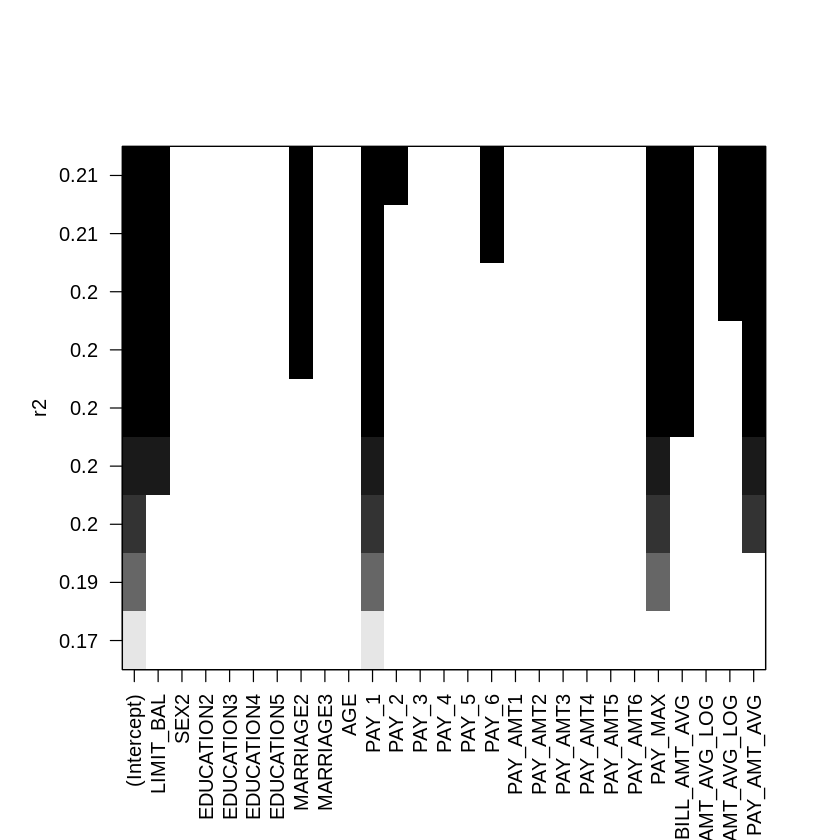

In [114]:
# Back ward and forward feature selection
set.seed(666)
backward = regsubsets(train.target ~ .,trainSetFull,method = "backward")
summary(backward)
plot(backward,scale="r2")

forward = regsubsets(train.target ~ .,trainSetFull,method = "forward")
summary(forward)
plot(forward,scale="r2")

glm = glm(train.target ~ ., data = trainSetFull,family = "binomial")
summary(glm)

# Features are to be removed: Age, PAY_2, PAY_4, PAY_5, PAY_AMT_AVG, BILL_AMT_AVG_LOG


In [115]:
# Select features

# Selected features according to forward and backward
# Dropped features: Sex, Education, Age, Pay 2-5, Pay_amt 1-6, bill_amt_avg_log, pay_amt_avg_log
trainSetSelected = trainSetFull[,-c(2,3,5,7:10,12:17,21,22)]
testSetSelected = testSetFull[,-c(2,3,5,7:10,12:17,21,22)]
names(trainSetSelected)

[1] "LIMIT_BAL"    "MARRIAGE"     "PAY_1"        "PAY_6"        "PAY_MAX"     
[6] "BILL_AMT_AVG" "PAY_AMT_AVG"

In [116]:
# Chi-square categorical feature selection
chistat = matrix(0,16,2)

names = names(trainSetFull)
var = rep("", 23)
col = ncol(trainSetFull)
class = train.target
for(i in 1:16) {
  if(is.factor(trainSetFull[,i])) {
    x = as.factor(trainSetFull[,i])
    tbl = table(x, class)
    cat("\n Attribute =", i, names[i], "\n")
    print(tbl)
    chi2res = chisq.test(tbl)
    print(chi2res)
    chistat[i,1] = chi2res$statistic
    chistat[i,2] = chi2res$p.value
  }
}

# All categorical data have p-value < 0.01


 Attribute = 2 SEX 
   class
x      0    1
  1 2913 1880
  2 4692 2515

	Pearson's Chi-squared test with Yates' continuity correction

data:  tbl
X-squared = 23.036, df = 1, p-value = 1.59e-06


 Attribute = 3 EDUCATION 
   class
x      0    1
  1 2782 1370
  2 3456 2197
  3 1238  807
  4   33    2
  5   96   19

	Pearson's Chi-squared test

data:  tbl
X-squared = 77.291, df = 4, p-value = 6.525e-16


 Attribute = 4 MARRIAGE 
   class
x      0    1
  1 3437 2110
  2 4069 2220
  3   99   65

	Pearson's Chi-squared test

data:  tbl
X-squared = 10.174, df = 2, p-value = 0.006177




Call:
glm(formula = train.target ~ ., family = "binomial", data = trainSetSelected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0338  -0.7613  -0.6589   0.8276   3.0567  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -8.757e-01  4.998e-02 -17.520  < 2e-16 ***
LIMIT_BAL    -1.271e-06  2.005e-07  -6.341 2.29e-10 ***
MARRIAGE2    -1.475e-01  4.335e-02  -3.403 0.000665 ***
MARRIAGE3    -4.449e-03  1.825e-01  -0.024 0.980554    
PAY_1         7.590e-01  3.808e-02  19.930  < 2e-16 ***
PAY_6         1.583e-01  3.572e-02   4.431 9.37e-06 ***
PAY_MAX       3.272e-01  3.064e-02  10.679  < 2e-16 ***
BILL_AMT_AVG  8.543e-07  4.026e-07   2.122 0.033835 *  
PAY_AMT_AVG  -2.869e-05  4.212e-06  -6.812 9.62e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 15766  on 11999  degrees of freedom
Residual deviance: 13147  on 11991  degrees o

      predicted
target    0    1
     0 7212  393
     1 2707 1688
[1] "Overall Accuracy:  74.17 %"
[1] "TPR:  38.41 %"
[1] "F1 Score:  52.13 %"
      predicted
target    0    1
     0 7311  448
     1 1376  865
[1] "Overall Accuracy:  81.76 %"
[1] "TPR:  38.6 %"
[1] "F1 Score:  48.68 %"


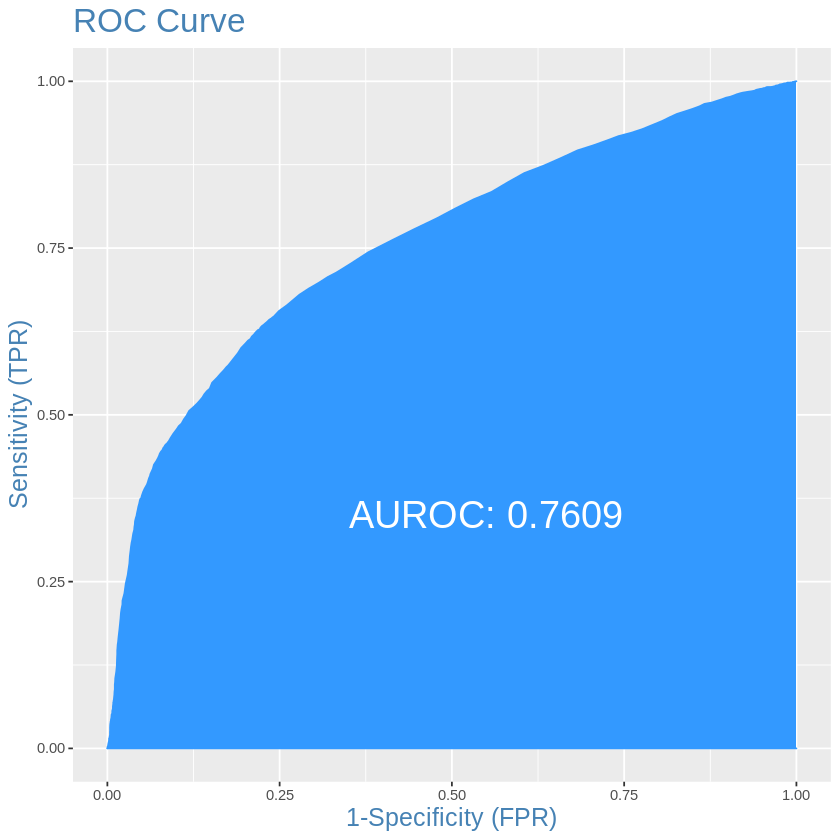

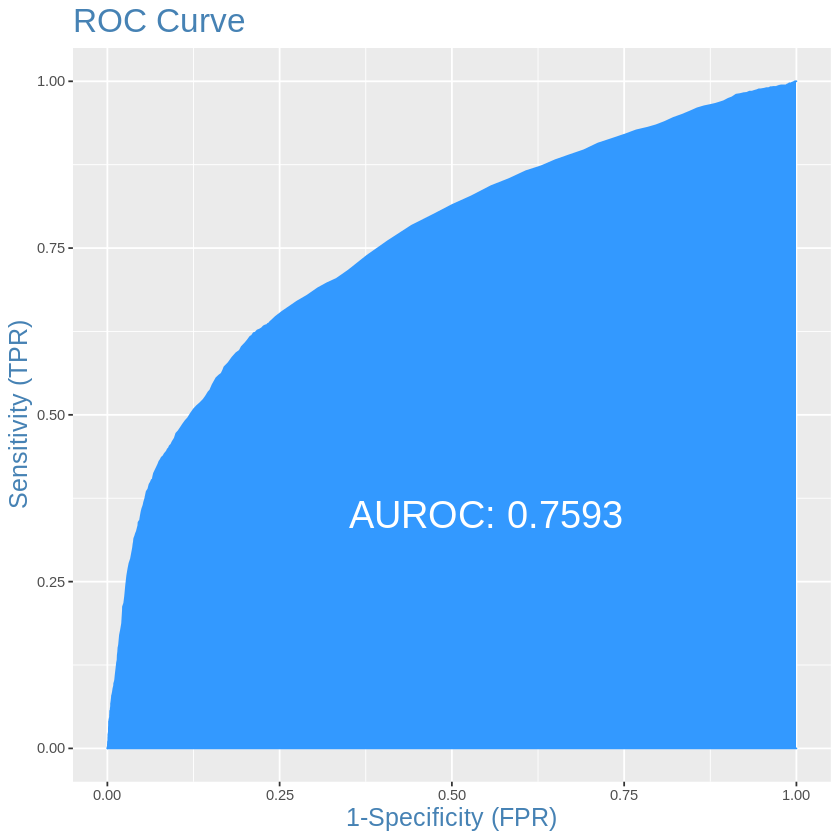

In [117]:
# Logistic regression

glm = glm(train.target ~ ., data = trainSetSelected,family = "binomial")
summary(glm)

train.glm = predict(glm, newdata = trainSetSelected)
train.glm.bin = ifelse(predict(glm, newdata = trainSetSelected)>0.5,1,0)

print_accuracy(train.glm.bin, train.target)
plotROC(train.target, train.glm)
  
test.glm = predict(glm, newdata = testSetSelected)
test.glm.bin = ifelse(predict(glm, newdata = testSetSelected)>0.5,1,0)
print_accuracy(test.glm.bin, test.target)
plotROC(test.target, test.glm)

In [118]:
# SVM models
set.seed(666)

# Linear Kernel
svm.linear <- svm(train.target ~ ., trainSetSelected, type="C-classification", kernel="linear")

train.res <- predict(svm.linear,data = trainSetSelected)
test.res <- predict(svm.linear, newdata = testSetSelected)
print_accuracy(train.res, train.target) # 75.19%
print_accuracy(test.res, test.target)

# Polynomial Kernel
svm.poly <- svm(train.target ~ ., data=trainSetSelected, type="C-classification", kernel="polynomial")

train.res <- predict(svm.poly,data = trainSetSelected)
test.res <- predict(svm.poly, newdata = testSetSelected)
print_accuracy(train.res, train.target)
print_accuracy(test.res, test.target)

# Sigmoid Kernel
svm.sigmoid <- svm(train.target ~ ., trainSetSelected, type="C-classification", kernel="sigmoid")

train.res <- predict(svm.sigmoid,data = trainSetSelected)
test.res <- predict(svm.sigmoid, newdata = testSetSelected)
print_accuracy(train.res, train.target) # 64.87%
print_accuracy(test.res, test.target)   # 67.96%

# Radial Kernel
svm.radial <- svm(train.target ~ ., data=trainSetSelected, type="C-classification", kernel="radial")

train.res <- predict(svm.radial,data = trainSetSelected)
test.res <- predict(svm.radial, newdata = testSetSelected)

print_accuracy(train.res, train.target) # 75.19%
print_accuracy(test.res, test.target)   # 80.61%,  TPR = 49.89%

      predicted
target    0    1
     0 7237  368
     1 2811 1584
[1] "Overall Accuracy:  73.51 %"
[1] "TPR:  36.04 %"
[1] "F1 Score:  49.91 %"
      predicted
target    0    1
     0 7365  394
     1 1439  802
[1] "Overall Accuracy:  81.67 %"
[1] "TPR:  35.79 %"
[1] "F1 Score:  46.67 %"
      predicted
target    0    1
     0 7018  587
     1 2450 1945
[1] "Overall Accuracy:  74.69 %"
[1] "TPR:  44.25 %"
[1] "F1 Score:  56.16 %"
      predicted
target    0    1
     0 7101  658
     1 1252  989
[1] "Overall Accuracy:  80.9 %"
[1] "TPR:  44.13 %"
[1] "F1 Score:  50.87 %"
      predicted
target    0    1
     0 5558 2047
     1 2118 2277
[1] "Overall Accuracy:  65.29 %"
[1] "TPR:  51.81 %"
[1] "F1 Score:  52.23 %"
      predicted
target    0    1
     0 5662 2097
     1 1075 1166
[1] "Overall Accuracy:  68.28 %"
[1] "TPR:  52.03 %"
[1] "F1 Score:  42.37 %"
      predicted
target    0    1
     0 6957  648
     1 2367 2028
[1] "Overall Accuracy:  74.88 %"
[1] "TPR:  46.14 %"
[1] "F1 Sco

      predicted
target    0    1
     0 6786  819
     1 2055 2340
[1] "Overall Accuracy:  76.05 %"
[1] "TPR:  53.24 %"
[1] "F1 Score:  61.95 %"
      predicted
target    0    1
     0 6840  919
     1 1096 1145
[1] "Overall Accuracy:  79.85 %"
[1] "TPR:  51.09 %"
[1] "F1 Score:  53.19 %"
      predicted
target    0    1
     0 6952  653
     1 2400 1995
[1] "Overall Accuracy:  74.56 %"
[1] "TPR:  45.39 %"
[1] "F1 Score:  56.65 %"
      predicted
target    0    1
     0 7035  724
     1 1229 1012
[1] "Overall Accuracy:  80.47 %"
[1] "TPR:  45.16 %"
[1] "F1 Score:  50.89 %"


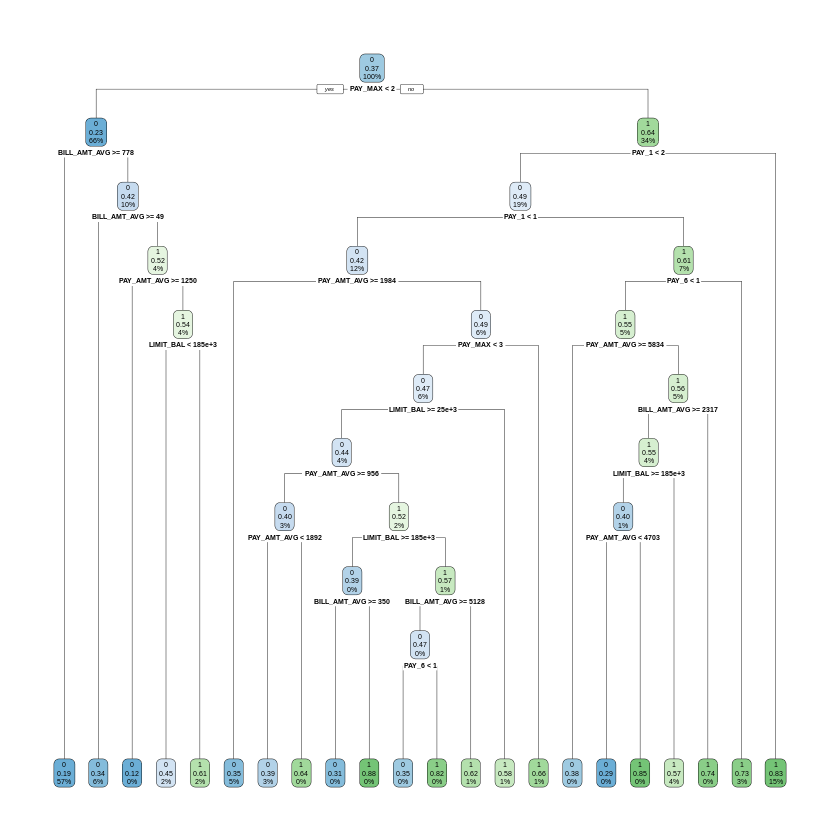

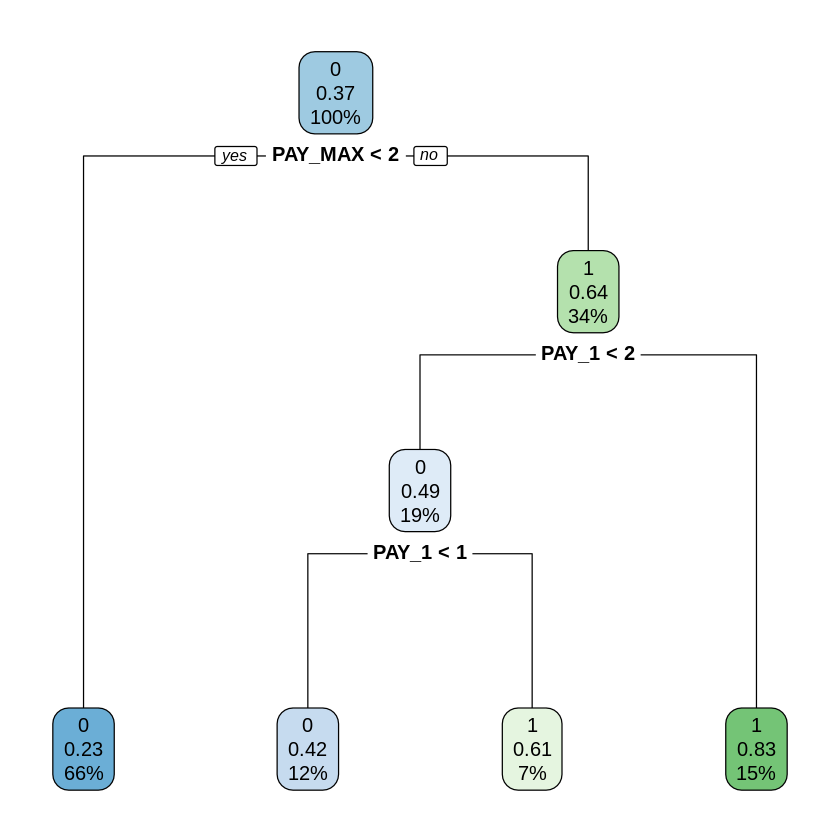

In [119]:
# CART Tree
# Recursive partitioning method
# Uses Gini index to calculate impurity index
# Try two different values of the complexity
# control parameter (cp)

# Use controll parameter of 0.001
cart.tree1 = rpart(train.target ~ ., 
                   trainSetSelected, 
                   model=TRUE,
                   method='class',
                   control=rpart.control(cp=0.001)) # Try cp = 0.001 and 0.01 and compare

train.cart1 = predict(cart.tree1, newdata=trainSetSelected,type="class")
test.cart1 = predict(cart.tree1, newdata=testSetSelected,type="class")

print_accuracy(train.cart1, train.target) # 76.15%
print_accuracy(test.cart1, test.target) # 79.37%

rpart.plot(cart.tree1)

# Use control parameter of 0.01
cart.tree2 = rpart(train.target ~ ., 
                   trainSetSelected, 
                   model=TRUE,
                   method='class',
                   control=rpart.control(cp=0.01))

train.cart2 = predict(cart.tree2, newdata=trainSetSelected,type="class")
test.cart2 = predict(cart.tree2, newdata=testSetSelected,type="class")

print_accuracy(train.cart2, train.target) # 76.15%
print_accuracy(test.cart2, test.target) # 79.37%

rpart.plot(cart.tree2)

In [120]:
# Bagging
set.seed(666)
bagging = bagging(train.target ~ ., nbagg=25,data=trainSetSelected) # Overfitting

train.bagging = predict(bagging, newdata=trainSetSelected) 
test.bagging = predict(bagging, newdata=testSetSelected) 

print_accuracy(train.bagging, train.target) # 76.15%
print_accuracy(test.bagging, test.target) # 79.37%

# varImp(bagging)

      predicted
target    0    1
     0 7525   80
     1   81 4314
[1] "Overall Accuracy:  98.66 %"
[1] "TPR:  98.16 %"
[1] "F1 Score:  98.17 %"
      predicted
target    0    1
     0 6363 1396
     1 1095 1146
[1] "Overall Accuracy:  75.09 %"
[1] "TPR:  51.14 %"
[1] "F1 Score:  47.92 %"



Call:
 randomForest(formula = train.target ~ ., data = trainSetSelected,      ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25.24%
Confusion matrix:
     0    1 class.error
0 6755  850   0.1117686
1 2179 2216   0.4957907
      predicted
target    0    1
     0 7195  410
     1 1840 2555
[1] "Overall Accuracy:  81.25 %"
[1] "TPR:  58.13 %"
[1] "F1 Score:  69.43 %"
      predicted
target    0    1
     0 6876  883
     1 1113 1128
[1] "Overall Accuracy:  80.04 %"
[1] "TPR:  50.33 %"
[1] "F1 Score:  53.06 %"


,Overall
,<dbl>
LIMIT_BAL,312.22111
MARRIAGE,62.28071
PAY_1,611.19716
PAY_6,147.82598
PAY_MAX,488.57820
BILL_AMT_AVG,526.69561
PAY_AMT_AVG,534.86190


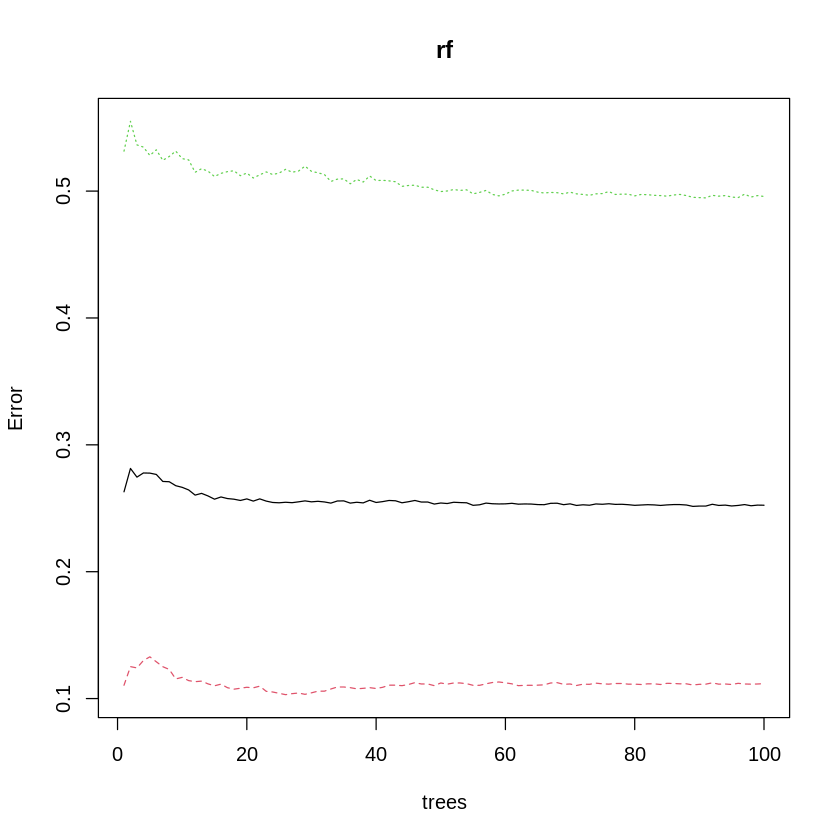

In [23]:
# Random forest
set.seed(666)
rf = randomForest(train.target ~ .,  data = trainSetSelected, ntree = 100)
print(rf) # R^2 = 85.95%
plot(rf)

train.rf = predict(rf, newdata = trainSetSelected)
test.rf = predict(rf, newdata = testSetSelected)

print_accuracy(train.rf, train.target) # 0.9319
print_accuracy(test.rf, test.target) # 0.8164

varImp(rf)

In [90]:
# Naive bayes
bayes = naive_bayes(train.target ~ ., trainSetSelected)
train.bayes = predict(bayes, newdata = trainSetSelected)
test.bayes = predict(bayes, newdata = testSetSelected)

print_accuracy(train.bayes, train.target)
print_accuracy(test.bayes, test.target)

      predicted
target    0    1
     0 6667  938
     1 2179 2216
[1] "Overall Accuracy:  74.02 %"
[1] "TPR:  50.42 %"
[1] "F1 Score:  58.71 %"
      predicted
target    0    1
     0 6770  989
     1 1113 1128
[1] "Overall Accuracy:  78.98 %"
[1] "TPR:  50.33 %"
[1] "F1 Score:  51.77 %"


In [26]:
# gbm
set.seed(666)
gbm = gbm(as.numeric(train.target)-1 ~ .,  data = trainSetSelected,distribution = "bernoulli", n.trees = 500, shrinkage = 0.07)

train.gbm = predict(gbm, data = trainSetSelected)
test.gbm = predict(gbm, newdata = testSetSelected)
train.gbm.bin = levels(train.target)[1+(train.gbm>0.5)]
test.gbm.bin = levels(test.target)[1+(test.gbm>0.5)]

print_accuracy(train.gbm.bin, train.target) 
print_accuracy(test.gbm.bin, test.target)

Using 500 trees...


Using 500 trees...




      predicted
target    0    1
     0 7177  428
     1 2647 1748
[1] "Overall Accuracy:  74.38 %"
[1] "TPR:  39.77 %"
[1] "F1 Score:  53.2 %"
      predicted
target    0    1
     0 7275  484
     1 1360  881
[1] "Overall Accuracy:  81.56 %"
[1] "TPR:  39.31 %"
[1] "F1 Score:  48.86 %"


In [27]:
# C50 Tree

C50tree = C5.0(train.target ~ ., data=trainSetSelected)
# summary(C50tree)
# plot(C50tree, type='s')

train.C50 = predict(C50tree, newdata = trainSetSelected)
test.C50 = predict(C50tree, newdata = testSetSelected)

print_accuracy(train.C50, train.target) 
print_accuracy(test.C50, test.target)

      predicted
target    0    1
     0 6776  829
     1 2163 2232
[1] "Overall Accuracy:  75.07 %"
[1] "TPR:  50.78 %"
[1] "F1 Score:  59.87 %"
      predicted
target    0    1
     0 6871  888
     1 1117 1124
[1] "Overall Accuracy:  79.95 %"
[1] "TPR:  50.16 %"
[1] "F1 Score:  52.86 %"


In [121]:
# Preprocessing for NN
continuous <- unlist(lapply(trainSetSelected, is.numeric))  
trainSetNN = trainSetSelected[, continuous]
continuous <- unlist(lapply(testSetSelected, is.numeric))  
testSetNN = testSetSelected[, continuous]

for(i in 1:ncol(trainSetNN)) {
  trainSetNN[,i] = (trainSetNN[,i] - mean(trainSetNN[,i]))/ sd(trainSetNN[,i])
  testSetNN[,i] = (testSetNN[,i] - mean(testSetNN[,i]))/ sd(testSetNN[,i])
}

In [35]:
# neural net parameter choosing

ntrain = nrow(trainSetNN)

rmse <- NULL
testacc <- NULL
TPR <- NULL
F1 <- NULL
size_seq <- NULL
for (size in 15:35) {
  set.seed(666)
  nn <- nnet(as.numeric(train.target)-1 ~ .,data=trainSetNN,size=size,entropy = TRUE,decay=5e-4,maxit=1000) 
  SSresiduals <- apply(nn$residuals,1:2,function(x) x*x)
  rmse0 <- sqrt(sum(SSresiduals)/(2*ntrain-1))
  rmse <- append(rmse,rmse0)
  test.pred <- predict(nn,newdata=testSetNN,type=c("class"))
  testacc <- append(testacc,mean(test.target == test.pred))
  tbl = table(test.pred, test.target)
  TPR <- append(TPR, tbl[2,2]/(tbl[1,2] + tbl[2,2]))
  F1 <- append(F1, F1_Score(y_pred = test.pred, y_true = test.target, positive=1))
  size_seq <- append(size_seq,size)
}

# weights:  121
initial  value 8930.977289 
iter  10 value 6440.316627
iter  20 value 6384.483867
iter  30 value 6345.455821
iter  40 value 6308.559535
iter  50 value 6275.363779
iter  60 value 6254.981364
iter  70 value 6242.944725
iter  80 value 6229.742700
iter  90 value 6221.236332
iter 100 value 6212.819435
iter 110 value 6207.069151
iter 120 value 6203.785313
iter 130 value 6200.594343
iter 140 value 6198.881086
iter 150 value 6197.135991
iter 160 value 6195.671810
iter 170 value 6194.867804
iter 180 value 6193.731023
iter 190 value 6190.655111
iter 200 value 6189.987025
iter 210 value 6188.880565
iter 220 value 6187.480992
iter 230 value 6186.687295
iter 240 value 6185.913925
iter 250 value 6185.464309
iter 260 value 6185.253613
iter 270 value 6185.005423
iter 280 value 6184.793103
iter 290 value 6184.018187
iter 300 value 6183.579422
iter 310 value 6183.244908
iter 320 value 6182.532030
iter 330 value 6182.393401
iter 340 value 6182.317909
iter 350 value 6182.274362
iter 360 va

[1] 0.2869592

[1] 0.7724

[1] 0.5279642

[1] 0.6818385

[1] 0.5296743

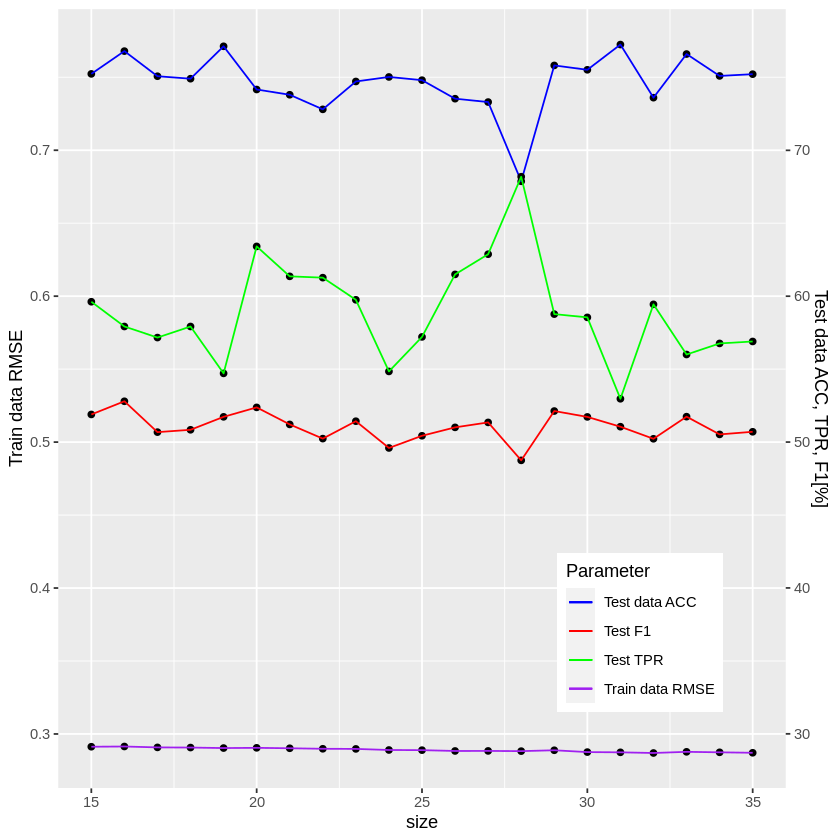

In [54]:
# Plot neural net

obs <- data.frame(cbind(size_seq,rmse,testacc,TPR, F1))
p <- ggplot(obs, aes(x = size_seq))
p <- p + geom_point(aes(y=rmse)) + geom_line(aes(y = rmse , color = "Train data RMSE")) 
p <- p + geom_point(aes(y=testacc)) + geom_line(aes(y = testacc, color = "Test data ACC"))
p <- p + geom_point(aes(y=TPR)) + geom_line(aes(y = TPR, color = "Test TPR")) 
p <- p + geom_point(aes(y=F1)) + geom_line(aes(y = F1, color = "Test F1")) 
p <- p + scale_y_continuous(sec.axis = sec_axis(~. *100, name = "Test data ACC, TPR, F1[%]"))
p <- p + scale_color_manual(values = c("blue", "red", "green","purple"))
p <- p + labs(y = "Train data RMSE",
x = "size",
color = "Parameter")
p <- p + theme(legend.position = c(0.8, 0.2))
p


min(rmse)
max(testacc)
max(F1)
max(TPR)
TPR[which(testacc == max(testacc))]

In [92]:
# ANN 1: size=20

set.seed(666)
nn <- nnet(as.numeric(train.target)-1 ~ .,data=trainSetNN,size=20,entropy = TRUE,decay=5e-4,maxit=1000)
train.nn <- predict(nn,newdata=trainSetNN,type=c("class"))
test.nn <- predict(nn,newdata=testSetNN,type=c("class"))
print_accuracy(train.nn, train.target)
print_accuracy(test.nn, test.target)

# weights:  161
initial  value 10998.760545 
iter  10 value 6477.513306
iter  20 value 6392.161886
iter  30 value 6350.267279
iter  40 value 6320.884665
iter  50 value 6300.177263
iter  60 value 6275.414914
iter  70 value 6261.740241
iter  80 value 6248.828541
iter  90 value 6237.830522
iter 100 value 6229.422463
iter 110 value 6219.902293
iter 120 value 6210.737107
iter 130 value 6204.214603
iter 140 value 6194.378162
iter 150 value 6189.243749
iter 160 value 6182.786854
iter 170 value 6178.526158
iter 180 value 6175.497034
iter 190 value 6171.467949
iter 200 value 6168.146768
iter 210 value 6166.150287
iter 220 value 6165.146975
iter 230 value 6164.457659
iter 240 value 6163.525693
iter 250 value 6162.745550
iter 260 value 6162.199093
iter 270 value 6161.190014
iter 280 value 6160.834274
iter 290 value 6160.690340
iter 300 value 6160.590846
iter 310 value 6160.473966
iter 320 value 6160.260359
iter 330 value 6160.162703
iter 340 value 6160.088613
iter 350 value 6159.970504
iter 360 v

In [93]:
# ANN 2: size=31

set.seed(666)
nn <- nnet(as.numeric(train.target)-1 ~ .,data=trainSetNN,size=31,entropy = TRUE,decay=5e-4,maxit=1000)
train.nn <- predict(nn,newdata=trainSetNN,type=c("class"))
test.nn <- predict(nn,newdata=testSetNN,type=c("class"))
print_accuracy(train.nn, train.target)
print_accuracy(test.nn, test.target)

# weights:  249
initial  value 7141.782317 
iter  10 value 6460.821901
iter  20 value 6364.686541
iter  30 value 6310.569917
iter  40 value 6283.618785
iter  50 value 6258.590508
iter  60 value 6237.514349
iter  70 value 6218.095483
iter  80 value 6208.713446
iter  90 value 6195.603001
iter 100 value 6184.927010
iter 110 value 6173.073965
iter 120 value 6162.858074
iter 130 value 6152.758547
iter 140 value 6143.408340
iter 150 value 6137.415120
iter 160 value 6133.556557
iter 170 value 6129.941610
iter 180 value 6125.755454
iter 190 value 6121.682281
iter 200 value 6118.141411
iter 210 value 6113.969471
iter 220 value 6107.809549
iter 230 value 6102.161958
iter 240 value 6097.204793
iter 250 value 6094.493201
iter 260 value 6090.786146
iter 270 value 6087.928065
iter 280 value 6085.320744
iter 290 value 6082.690624
iter 300 value 6080.113513
iter 310 value 6077.380887
iter 320 value 6073.136408
iter 330 value 6070.214692
iter 340 value 6067.571144
iter 350 value 6065.174945
iter 360 va

In [ ]:
# Cross validation